# AIM

NOTE: I am getting number of layers from fig 2a of https://arxiv.org/pdf/2111.06414.pdf

### Part 1
This notebook just generates the ECD parameters (the angles for conditional displacement and qubit rotations). It assumes that we can enact conditional displacement gates and qubit rotation gates. What we need though are the angles through which we can prepare distance fock states in the cavity

### Part 2
Given the param in part 1, in this part we test them by doing unitary time evolution of ECD gates

### 1. Part 1

In [1]:
import sys 
sys.path.append('C:\\Users\\Eesh Gupta\\Documents\\RU Research\\Chakram')
sys.path.append('C:\\Users\\Eesh Gupta\\Documents\\RU Research\\Chakram\\ECD_control')


In [2]:
# from ECD_control import ECD_optimization
# from ECD_control import ECD_pulse_construction

import numpy as np
import qutip as qt 
from ECD_new_batch_optimizer import BatchOptimizer
from ECD_control.ECD_optimization.optimization_analysis import OptimizationAnalysis, OptimizationSweepsAnalysis
import matplotlib.pyplot as plt
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


Need tf version 2.3.0 or later. Using tensorflow version: 2.7.0


Need tf version 2.3.0 or later. Using tensorflow version: 2.7.0



[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12718180419348793934
 xla_global_id: -1]

In [3]:
#The target oscillator state.
N =10
Fock = 1
psi_t = qt.basis(N,Fock) #target state

In [4]:
psi_t

Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

In [5]:
#Optimization of ECD Circuit parameters (betas, phis, and thetas)
#the optimization options
opt_params = {
'N_blocks' : 4, #circuit depth
'N_multistart' : 200, #Batch size (number of circuit optimizations to run in parallel)
'epochs' : 200, #number of epochs before termination
'epoch_size' : 10, #number of adam steps per epoch
'learning_rate' : 0.01, #adam learning rate
'term_fid' : 0.995, #terminal fidelitiy
'dfid_stop' : 1e-6, #stop if dfid between two epochs is smaller than this number
'beta_scale' : 3.0, #maximum |beta| for random initialization
'initial_states' : [qt.tensor(qt.basis(2,0),qt.basis(N,0))], #qubit tensor oscillator, start in |g> |0>
'target_states' : [qt.tensor(qt.basis(2,0), psi_t)], #end in |e> |target>.
'name' : 'Fock %d' % Fock, #name for printing and saving
'filename' : None, #if no filename specified, results will be saved in this folder under 'name.h5'
}


#note: optimizer includes pi pulse in every ECD step. However, final ECD step is implemented 
#in experiment as a displacement since the qubit and oscillator should be disentangled at this point.
#So, we ask the optimizer to end in |e> |target> instead of |g>|target>.

#### Filename for angles to be stored

In [6]:
fname = 'ECD_Angles_Fock1Of10_4ECD_1.txt'

In [7]:
#create optimization object. 
#initial params will be randomized upon creation
opt = BatchOptimizer(**opt_params)

#print optimization info. 
opt.print_info()

None
Tensor("alphas:0", shape=(1, 200), dtype=complex64)
Tensor("alphas:0", shape=(4, 200), dtype=complex64)
optimization_type: state transfer
N_multistart: 200
N_blocks: 4
term_fid: 0.995
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 10
epochs: 200
beta_scale: 3.0
alpha_scale: 1.0
theta_scale: 3.141592653589793
use_displacements: False
use_phase: False
name: Fock 1
comment: 
user_angles: None
N_cav: 10
filename: Fock 1.h5

Best circuit parameters found:
betas:         [ 0.92969+0.60196j  0.3108 -0.47428j -0.61984-0.91641j -0.01243+0.02067j]
alphas:        [0.+0.j]
phis (deg):    [  0.       30.41176 134.21758 -75.89832]
thetas (deg):  [-161.50108 -161.17651   55.55114  -28.73885]
Max Fidelity:  0.365018




In [8]:
#run optimizer.
opt.optimize()

Start time: 2022-09-13 09:07:55
 Epoch: 200 / 200 Max Fid: 0.990507 Avg Fid: 0.864524 Max dFid: 0.001688 Avg dFid: 0.000006 Elapsed time: 0:01:42.069024 Remaing time: 0:00:000.510168

Optimization stopped.  Reached maximum number of epochs. Terminal fidelity not reached.

optimization_type: state transfer
N_multistart: 200
N_blocks: 4
term_fid: 0.995
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 10
epochs: 200
beta_scale: 3.0
alpha_scale: 1.0
theta_scale: 3.141592653589793
use_displacements: False
use_phase: False
name: Fock 1
comment: 
user_angles: None
N_cav: 10
filename: Fock 1.h5

Best circuit parameters found:
betas:         [-2.21351+1.84407j  1.06721-3.42818j -0.84524+2.88038j  3.21799-2.63463j]
alphas:        [0.+0.j]
phis (deg):    [  0.       75.337    73.60186 -55.55729]
thetas (deg):  [179.99998   0.      179.99998   0.     ]
Max Fidelity:  0.990506


termination reason: epochs
optimization timestamp (start time): 2022-09-13 09:07:55
timestamp (end time)

'2022-09-13 09:07:55'

In [9]:
#can print info, including the best circuit found.
opt.print_info() 

optimization_type: state transfer
N_multistart: 200
N_blocks: 4
term_fid: 0.995
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 10
epochs: 200
beta_scale: 3.0
alpha_scale: 1.0
theta_scale: 3.141592653589793
use_displacements: False
use_phase: False
name: Fock 1
comment: 
user_angles: None
N_cav: 10
filename: Fock 1.h5

Best circuit parameters found:
betas:         [-2.21351+1.84407j  1.06721-3.42818j -0.84524+2.88038j  3.21799-2.63463j]
alphas:        [0.+0.j]
phis (deg):    [  0.       75.337    73.60186 -55.55729]
thetas (deg):  [179.99998   0.      179.99998   0.     ]
Max Fidelity:  0.990506




### Saving angles: My way (without using h5 files, just the standard txt)

In [10]:
#
betas = opt.best_circuit()['betas']
phis = opt.best_circuit()['phis']
thetas = opt.best_circuit()['thetas']

params = [np.real(betas), np.imag(betas), phis, thetas]
for i in range(len(params)):
    params[i] = [float(k) for k in params[i]]

a_file = open(fname, "w")
np.savetxt(a_file, params)
a_file.close()

In [11]:
#Analysis of the results. Can load the .h5 file.
#all data is stored as a timestamp in a .h5 file
#You can also specify which timestamp you are analyzing. Be defult, it will use the most recent optimization in the file.
#I  recommend using "HDFview" software to understand data structure
#filename = opt.filename
# filename = 'Fock %d.h5' % Fock
# analysis = OptimizationAnalysis(filename)
# analysis.print_info() #we can print info of best circuit

In [12]:
#We can plot the fidelities of the different parallel optimizations
#analysis.plot_fidelities()

In [13]:
#We can also load the best circuit, states, and other parameters (see OptimizationAnalysis class)
# best_circuit = analysis.best_circuit()
# print(best_circuit)
# target_state = analysis.target_state()
# print(target_state)

In [14]:
#there are a few other things we can plot.
# analysis.plot_mag_betas()
# analysis.plot_average_magnitude_beta()

### 2. Part 2

##### Getting the Drive

In [15]:
from Simplified_ECD_pulse_construction import *

In [16]:
import numpy as np

In [22]:
class ecd_pulse_single_mode: 
    
    def __init__(self, 
                 param_file = None, 
                 storage_params = None, 
                 qubit_params = None, 
                 alpha_CD =30, 
                 buffer_time = 4): 
        '''
        betas, thetas, phis : ecd parameters
        n_q : # of levels in the qubit
        n_c : # of levels in the cavity 
        
        storage_params : {
                            "chi_kHz": -33, #dispersive shift
                            "chi_prime_Hz": 0, #second order dispersive shift
                            "Ks_Hz": 0, #Kerr correction not yet implemented.
                            "epsilon_m_MHz": 400, #largest oscillator drive amplitude in MHz (max|epsilon|)
                            "unit_amp": 0.01, #DAC unit amp of gaussian displacement to alpha=1.
                            "sigma": 11, #oscillator displacement sigma
                            "chop": 4, #oscillator displacement chop (number of stds. to include in gaussian pulse)
                        }
                        
        qubit_params : {'unit_amp': 0.5, 'sigma': 6, 'chop': 4} #parameters for qubit pi pulse.
        '''
        self.param_file = param_file # for loading parameters
        self.betas = None
        self.phis = None
        self.thetas = None
        self.load_params()
        
        #Pulse parameters
        self.storage_params = storage_params
        if storage_params == None: 
            self.storage_params = {
                            "chi_kHz": -33, 
                            "chi_prime_Hz": 0, 
                            "Ks_Hz": 0,
                            "epsilon_m_MHz": 400, 
                            "unit_amp": 0.01, 
                            "sigma": 11, 
                            "chop": 4, 
                        }
            
        self.qubit_params = qubit_params
        if self.qubit_params == None: 
            self.qubit_params = {'unit_amp': 0.5,
                                 'sigma': 6, 
                                 'chop': 4} 
        self.storage = None
        self.qubit = None
        
        
        #parameters obtained after get_pulse() is called
        self.cavity_dac_pulse_GHz = None
        self.qubit_dac_pulse_GHz = None
        self.alpha = None 
        
        #other keyword params
        self.alpha_CD = alpha_CD
        self.buffer_time = buffer_time
        
        
    
    ####
    import cmath
    ####
    def load_params(self): 
        '''
        Loads betas, thetas, phis
        '''
        params = np.loadtxt(self.param_file)
        self.betas = np.asarray([complex(params[0][i], params[1][i]) for i in range(len(params[0]))])
        self.phis = params[2]
        self.thetas = params[3]
        return None
    
    def get_pulses(self): 
        '''
        Evaluates cavity and qubit pulses for the desired ECD simulation
        '''
        #Creates objects
        self.storage = FakeStorage(**self.storage_params)
        self.qubit = FakeQubit(**self.qubit_params)
        
        #Qubit pi pulse stuff ... calculating conversion between qubit DAC units and MHz (Omega)
        pi = rotate(np.pi, phi=0, sigma=self.qubit_params['sigma'], chop=self.qubit_params['chop'], dt=1)
        Omega_m = np.real(np.max(pi))/self.qubit_params['unit_amp']
        
        #get pulses
        pulse_dict = conditional_displacement_circuit(self.betas, self.phis, 
                                                      self.thetas, 
                                                      self.storage, 
                                                      self.qubit,
                                                      self.alpha_CD,
                                                      buffer_time = self.buffer_time, 
                                                      kerr_correction = False, 
                                                      chi_prime_correction=True,
                                                      final_disp=True, 
                                                      pad=True)
        
        
        cavity_dac_pulse, qubit_dac_pulse, = pulse_dict['cavity_dac_pulse'], pulse_dict['qubit_dac_pulse']

        # conversions
        self.cavity_dac_pulse_GHz = (2*np.pi)*(10**(-3))*self.storage.epsilon_m_MHz*cavity_dac_pulse #convert from DAC to Mhz to Ghz
        self.qubit_dac_pulse_GHz = (2*np.pi)*10**(-3)*self.qubit.Omega_m_MHz*qubit_dac_pulse #convert from DAC to Mhz to Ghz
        #alpha
        self.get_alpha()
        
        return None
    
    def alpha_from_epsilon_nonlinear_finite_difference(
        self, epsilon_array, delta=0, alpha_init=0 + 0j):
        dt = 1
        alpha = np.zeros_like(epsilon_array)
        alpha[0] = alpha_init
        alpha[1] = alpha_init
        for j in range(1, len(epsilon_array) - 1):
            alpha[j + 1] = (
                    2*
                     dt
                    * (
                        -1j * delta# * alpha[j]
                        #- 2j * Ks * np.abs(alpha[j]) ** 2 * alpha[j]
                        #- (kappa / 2.0) * alpha[j]
                        - 1j * epsilon_array[j]
                    )
                    + alpha[j - 1])
        return alpha
    
    def get_alpha(self):
        '''
        Solve equation of motion and get corresponding displacements for displaced frame simulations
        '''
        self.alpha = alpha_from_epsilon_nonlinear_finite_difference(
            epsilon_array =self.cavity_dac_pulse_GHz , delta=0, alpha_init=0 + 0j)
        return None
    
    #####
    import matplotlib.pyplot as plt
    #####
    def plot_pulses(self): 
        '''
        Plots cavity dac pulse, the resultant displacement of cavity and the qubit pulse
        '''
        fig, axs = plt.subplots(3,1)
        axs[0].plot(np.real(self.cavity_dac_pulse_GHz))
        axs[0].plot(np.imag(self.cavity_dac_pulse_GHz))
        axs[0].set_ylabel('cavity dac pulse (Ghz)', fontsize = 10)
        axs[1].plot(np.real(self.alpha))
        axs[1].plot(np.imag(self.alpha))
        axs[1].set_ylabel('alpha', fontsize = 10)
            
        axs[2].plot(np.real(self.qubit_dac_pulse_GHz))
        axs[2].plot(np.imag(self.qubit_dac_pulse_GHz))
        axs[2].set_ylabel('qubit dac pulse (GHz)', fontsize = 10)
        plt.xlabel('ns')
        
        return None

In [23]:
pulse_sim = ecd_pulse_single_mode(param_file = fname)

In [24]:
pulse_sim.get_pulses()

Modified method: Cond Disp Circuit
Modified conditional displacement called
---------------------------
Final Displacement: 2.8810082379973463
Modified conditional displacement called
---------------------------
Final Displacement: 3.590457486466086
Modified conditional displacement called
---------------------------
Final Displacement: 3.0018323480827696
Modified conditional displacement called
---------------------------
Final Displacement: 4.154922989596412


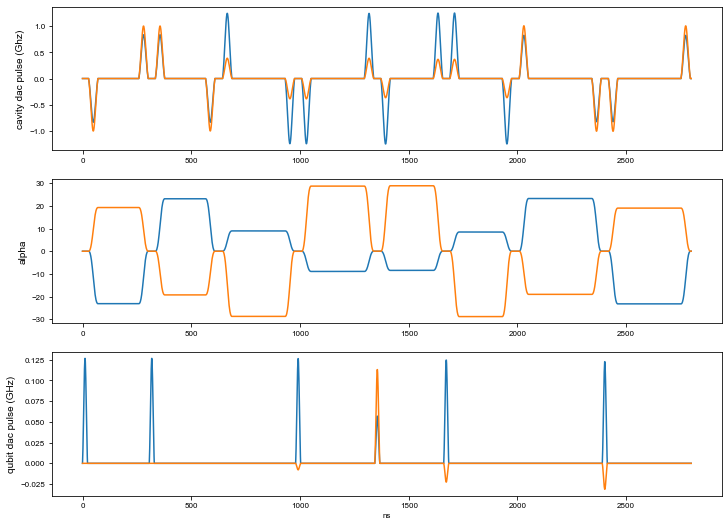

In [25]:
pulse_sim.plot_pulses()

In [43]:
qutip_sim  = qutip_sim_single_mode(n_q = 2, n_c = 10, alpha = pulse_sim.alpha, qubit_pulse = pulse_sim.qubit_dac_pulse_GHz)
qutip_sim.me_solve()

TypeError: Incorrect Q_object specification

In [33]:
from qutip import *

In [42]:
class qutip_sim_single_mode:
    
    def __init__(self, n_q, n_c, chi = None,
                 alpha = [], qubit_pulse = [],
                 sim_params = None, states_filename = 'states store'):
        '''
        n_q, n_c = # of levels in qubit, cavity
        
        sim_params = sim_params = {'bare_qubit_mode_coupling':0,
        'Stark Shift': 0,  'transmon_relax': 0,'transmon_dephasing': 0,
        'cavity_relax': 0,'cavity_dephasing': 0}  # 0 means false, 1 means true or activates    
        '''
        self.n_q = n_q
        self.n_c = n_c
        
        self.chi = -33*2*np.pi*(10**(-6)) # Alec's params
        
        ##get pulses
        self.alpha = alpha
        self.times = len(alpha)
        self.qubit_pulse = qubit_pulse
        
        self.sim_params = sim_params
        if sim_params == None: 
            sim_params =  {'bare_qubit_mode_coupling':0,
        'Stark Shift': 0,  'transmon_relax': 0,'transmon_dephasing': 0,
        'cavity_relax': 0,'cavity_dephasing': 0}
        self.get_basic_ops()
        
            
        #get operators
        self.H0 = tensor(self.identity_q, self.identity_c) # time independent part
        ## drive terms (ecd pulses)
        self.Hd = [ #qubit terms
                 [tensor(self.a_q, self.identity_c), np.conjugate(self.qubit_pulse)], 
                 [tensor(self.adag_q, self.identity_c), self.qubit_pulse],
                 # ecd pulses
                 [(self.chi/2)*tensor(sigmaz(), self.a_c), np.conjugate(self.alpha)],
                 [(self.chi/2)*tensor(sigmaz(), self.adag_c), self.alpha],
                 ] 
        self.c_ops = []
        
        self.states_filename = states_filename
        
    
    def get_basic_ops(self): 
        '''
        Creates identity, creation/annihilation for qubit/cavity
        '''
        self.identity_q = qeye(self.n_q)
        self.identity_c = qeye(self.n_c)

        self.a_q = destroy(self.n_q)
        self.a_c = destroy(self.n_c)

        self.adag_q = create(self.n_q)
        self.adag_c = create(self.n_c)

        num_q = num(self.n_q)
        num_c =  num(self.n_c)
        
        return None
    
    def square_list(self, listy):
        '''
        Input: List of numbers [a,b,c,...]
        Output: [a^2, b^2, ...] (norm squared for complex numbers)
        '''
        return np.real( [np.real(i)**2 + np.imag(i)**2 for i in listy])
    
    def add_bare_qubit_mode_coupling(self):
        '''
        Add the basic dispersive shift term to Ham
        '''
        self.H += (self.chi/2)*tensor(sigmaz(), self.num_c)
        return None
    
    def add_stark_shift(self):
        '''
        Add the basic dispersive shift term to Ham
        '''
        term = [(self.chi/2)*tensor(sigmaz(), self.identity_c), self.square_list(self.alpha)]
        self.Hd.append(term)
        return None
    
    def add_qubit_relaxation(self, T1 = 30e+3):
        '''
        qubit relaxation (T1 in nanoseconds)
        '''
        gamma_relax = 1/T1
        term = np.sqrt(gamma_relax/2)*tensor(self.a_q, self.identity_c)
        self.c_ops.append(term)
        return None
    
    def add_qubit_dephasing(self, T1 = 30e+3, Techo = 65e+3):
        '''
        qubit relaxation (T1, T2 in nanoseconds)
        '''
        gamma_relax = 1/T1
        gamma_echo = 1/Techo
        gamma_phi = gamma_echo - (gamma_relax/2)
        
        term = np.sqrt(gamma_phi)*tensor(self.num_q, self.identity_c)
        self.c_ops.append(term)
        return None
    
    def add_cavity_relaxation(self, T1 = 10e+6):
        '''
        qubit relaxation (T1 in nanoseconds)
        
        in displaced frame, the a_c -> a_c + alpha but the alpha part
        can be taken care of by using classical EOM when designing pulses
        '''
        gamma_relax = 1/T1
        term = np.sqrt(gamma_relax/2)*tensor(self.identity_q, self.a_c)
        self.c_ops.append(term)
        return None
    
    def add_cavity_dephasing(self, T1 = 10e+6, Techo = 10e+6):
        '''
        qubit dephasing (T1, Techo in nanoseconds)
        '''
        gamma_relax = 1/T1
        gamma_echo = 1/Techo
        gamma_phi = gamma_echo - (gamma_relax/2)
        
        alpha_CD = np.abs(max(self.alpha))
        
        #approximating by using max value in alpha list (don't know how to input time dependent amplitudes on 
        # collapse operators)
        disp_frame_adag = self.adag_c + (np.abs(max(np.conjugate(self.alpha)))*self.identity_c)
        disp_frame_a = self.a_c + (np.abs(max(self.alpha))*self.identity_c)
        
        term = np.sqrt(gamma_phi)*tensor(self.identity_q, disp_frame_adag*disp_frame_a)
        self.c_ops.append(term)
        return None
    
    def me_solve(self, initial = None): 
        '''
        Solve the master equation 
        '''
        if initial == None: 
            initial = tensor(basis(self.n_q,0), basis(self.n_c,0))
            
        opts = Options(store_states=True, store_final_state=True, nsteps = 5000, max_step = 10)
        ## since smallest pulse is a pi pulse which is 40 ns long
        
        self.output = mesolve([self.H0, self.Hd], initial , self.times, self.c_ops, [], options =opts)        
        qsave(self.output.states, self.states_filename)
        
        return None
    
    def dot(state1, state2):
        '''
        dotting both states
        '''
        fid = state1.overlap(state2)
        return fid*np.conjugate(fid)

    
    def get_fidelity(self, target): 
        '''
        dot final state after evolution with target
        '''
        return dot(self.output.states[-1], target)
    
    
    def plot_populations_single_mode(self, states_filename, figname = 'figure', title = None):
        '''
        Given output of mesolve, outputs populations with qubit as ground
        '''
        
        output_states = qload(states_filename)
        fig, axs = plt.subplots(2,1, figsize=(10,8))
        probs = []
        times = [k/1000 for k in range(len(output_states))]
        max_num_levels = 10 # to be shown on the plot

        #qubit grounded
        for i in range(max_num_levels):
            target = tensor(basis(n_q,0), basis(n_c, i))
            pops = []
            for k in range(len(output_states)): 
                z = target.overlap(output_states[k])
                pops.append(z.real**2 + z.imag**2)
            axs[0].plot(times, pops, label = '|g,'+str(i)+'>')

        #qubit excited
        for i in range(max_num_levels):
            target = tensor(basis(n_q,1), basis(n_c, i))
            pops = []
            for k in range(len(output_states)): 
                z = target.overlap(output_states[k])
                pops.append(z.real**2 + z.imag**2)
            axs[1].plot(times, pops, linestyle = '--',  label = '|e,'+str(i) +'>')

        axs[1].set_xlabel(r"Time ($\mu$s)", fontsize = 18)
        axs[1].set_ylabel("Populations", fontsize = 18)
        axs[0].set_ylabel("Populations", fontsize = 18)
        axs[0].tick_params(axis = 'both', which = 'major', labelsize = '15')
        axs[0].tick_params(axis = 'both', which = 'minor', labelsize = '15')
        axs[1].tick_params(axis = 'both', which = 'major', labelsize = '15')
        axs[1].tick_params(axis = 'both', which = 'minor', labelsize = '15')
    #     axs[0].set_xticks(fontsize= 10)
    #     axs[1].set_yticks(fontsize= 10)
    #     axs[0].set_yticks(fontsize= 10)
    #     plt.legend(prop={'size': 20},  fontsize = 8, loc='upper center', bbox_to_anchor=(0.5, 1.05),
    #           ncol=3, fancybox=True, shadow=True)   
        axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = '15')
        axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = '15')
        #plt.legend(fontsize = '15')
        #fig.suptitle(title, fontsize = 15)
        plt.tight_layout()
        fig.savefig(figname, dpi = 1000)
        return None


In [152]:
from qutip import *
from qutip.control import *
from math import *

In [153]:
T = len(cavity_dac_pulse)
times = np.linspace(0, T, T) #1ns timesteps

###### Qutip: System Hammy

In [154]:
n_c = 10  #number of levels in cavity
n_q = 2 #number of levels in qubit

#N = 1 #target cavity state


#photon depenedent number shifts
chi = storage_params["chi_kHz"]*2*pi*(10**(-6)) #linear
chi_ = storage_params["chi_prime_Hz"]*(10**(-9)) #quadratic

##mode to mode coupling 
eta = 10**(-9)

In [155]:
# Creating identity, annhilitation/creation, num operators 
identity_q = qeye(n_q)
identity_c = qeye(n_c)

a_q = destroy(n_q)
a_c = destroy(n_c)

adag_q = create(n_q)
adag_c = create(n_c)

num_q = num(n_q)
num_c =  num(n_c)


c_ops = []

tlist = times




In [164]:
# Displace Frame hammy
H0_disp = tensor(identity_q,identity_c)#(chi/2)*tensor(sigmaz(),num_c)

In [165]:
# prepping time depedent hammys
alpha_sq =np.real( [np.real(i)**2 + np.imag(i)**2 for i in alpha])
H = [
#     H0_disp,
    [tensor(a_q, qeye(n_c)), np.conjugate(qubit_dac_pulse_GHz)], 
     [tensor(adag_q, qeye(n_c)), qubit_dac_pulse_GHz],
#         [a_q, qubit_imag], #convert from DAC to MHz to Ghz
#      [adag_q, qubit_real],
     [(chi/2)*tensor(sigmaz(), destroy(n_c)), alpha_star],
     [(chi/2)*tensor(sigmaz(), create(n_c)), alpha],
     #[(chi/2)*tensor(sigmaz(), qeye(n_c)), alpha_sq]
     ]

###### Qutip: Simulation

In [166]:
states_filename = 'State_store_g0_g1'

In [167]:
psi0 = tensor(basis(n_q,0), basis(n_c,0))
opts = Options(store_states=True, store_final_state=True, nsteps = 5000)
output = mesolve(H, psi0 , times, c_ops, [], options =opts)
qsave(output.states, states_filename)
rho = output.states[-1]

In [168]:
rho

Quantum object: dims = [[2, 10], [1, 1]], shape = (20, 1), type = ket
Qobj data =
[[-5.30301514e-03+1.19288384e-02j]
 [-7.48908390e-01-6.47733646e-01j]
 [-2.49895748e-03+5.20877129e-03j]
 [ 1.62718544e-02-2.28051313e-02j]
 [-2.62597381e-04+1.18006839e-03j]
 [-8.55804072e-02-4.23534164e-02j]
 [-4.61036058e-04+3.55805912e-04j]
 [ 1.00218036e-02-2.53055812e-02j]
 [-6.47401104e-05+3.59004451e-05j]
 [ 2.59545214e-03+1.05430881e-03j]
 [ 7.03053048e-04+3.67588799e-02j]
 [ 2.56191092e-02+9.73091808e-03j]
 [-2.61922306e-02+1.14121646e-03j]
 [-1.18976518e-03+1.86008061e-03j]
 [ 1.24539949e-02+5.25871380e-02j]
 [ 4.06233510e-03+4.57246866e-04j]
 [-4.94942423e-02+2.05941235e-02j]
 [-4.93965272e-04+1.59844660e-03j]
 [-4.86253609e-03-9.37851100e-03j]
 [-2.07923001e-04-1.12138291e-04j]]

In [169]:
target_state = tensor(basis(n_q,0), basis(n_c, 1))
fidelity = rho.overlap(target_state)
#print('Fidelity is '+ str(fidelity*fidelity.imag))

In [170]:
fidelity*np.conjugate(fidelity)

(0.9804226523980482+0j)

In [171]:
opt.best_fidelity()

0.9813107

In [172]:
import pylab as plot
params = {'legend.fontsize': 15,
          'legend.handlelength': 2}
plot.rcParams.update(params)

In [173]:
def plot_populations_single_mode(output_states, figname, title):
    '''
    Given output of mesolve, outputs populations with qubit as ground
    '''
    fig, axs = plt.subplots(2,1, figsize=(10,8))
    probs = []
    times = [k/1000 for k in range(len(output_states))]
    max_num_levels = 10 # to be shown on the plot
    
    #qubit grounded
    for i in range(max_num_levels):
        target = tensor(basis(n_q,0), basis(n_c, i))
        pops = []
        for k in range(len(output_states)): 
            z = target.overlap(output_states[k])
            pops.append(z.real**2 + z.imag**2)
        axs[0].plot(times, pops, label = '|g,'+str(i)+'>')
    
    #qubit excited
    for i in range(max_num_levels):
        target = tensor(basis(n_q,1), basis(n_c, i))
        pops = []
        for k in range(len(output_states)): 
            z = target.overlap(output_states[k])
            pops.append(z.real**2 + z.imag**2)
        axs[1].plot(times, pops, linestyle = '--',  label = '|e,'+str(i) +'>')

    axs[1].set_xlabel(r"Time ($\mu$s)", fontsize = 18)
    axs[1].set_ylabel("Populations", fontsize = 18)
    axs[0].set_ylabel("Populations", fontsize = 18)
    axs[0].tick_params(axis = 'both', which = 'major', labelsize = '15')
    axs[0].tick_params(axis = 'both', which = 'minor', labelsize = '15')
    axs[1].tick_params(axis = 'both', which = 'major', labelsize = '15')
    axs[1].tick_params(axis = 'both', which = 'minor', labelsize = '15')
#     axs[0].set_xticks(fontsize= 10)
#     axs[1].set_yticks(fontsize= 10)
#     axs[0].set_yticks(fontsize= 10)
#     plt.legend(prop={'size': 20},  fontsize = 8, loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)   
    axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = '15')
    axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = '15')
    #plt.legend(fontsize = '15')
    #fig.suptitle(title, fontsize = 15)
    plt.tight_layout()
    fig.savefig(figname, dpi = 1000)

Loaded list object.


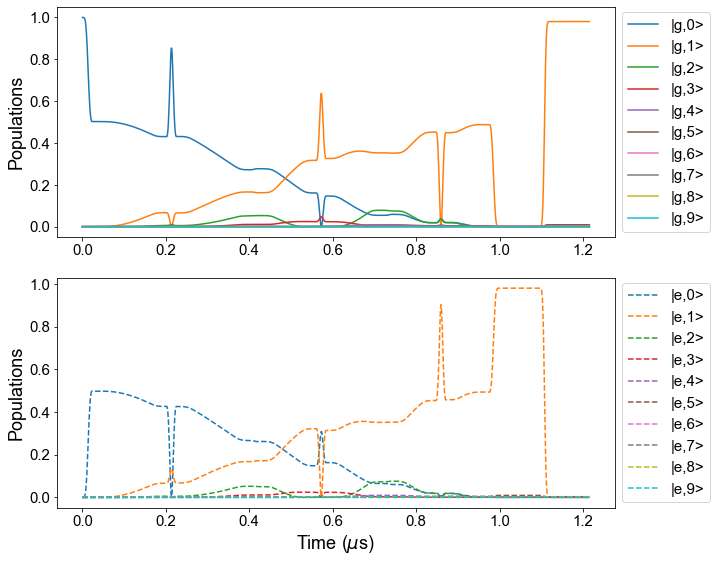

In [174]:
figname = "g0_g1"
data = qload(states_filename)
plot_populations_single_mode(data, figname, None)

# Dump

In [102]:
def plot_populations(output, figname):
    '''
    Given output of mesolve, outputs populations with qubit as ground
    '''
    fig = plt.figure(figsize=(10,8))
    probs = []
    times = [k for k in range(len(output.states))]
    max_num_levels = 3 # to be shown on the plot
    
    #qubit grounded
    for i in range(max_num_levels):
        for j in range(max_num_levels):
            target = tensor(basis(n_q,0), basis(n_c, i), basis(n_c, j))
            pops = []
            for k in range(len(output.states)): 
                z = target.overlap(output.states[k])
                pops.append(z.real**2 + z.imag**2)
            plt.plot(times, pops, label = '|g,'+str(i)+',' + str(j)+'>')
    
    #qubit excited
    for i in range(max_num_levels):
        for j in range(max_num_levels):
            target = tensor(basis(n_q,1), basis(n_c, i), basis(n_c, j))
            pops = []
            for k in range(len(output.states)): 
                z = target.overlap(output.states[k])
                pops.append(z.real**2 + z.imag**2)
            plt.plot(times, pops, label = '|e,'+str(i)+',' + str(j)+'>')
            
    plt.xlabel("Time (ns)", fontsize = 14)
    plt.ylabel("Populations", fontsize = 14)
    plt.xticks(fontsize= 10)
    plt.yticks(fontsize= 10)
#     plt.legend(prop={'size': 20},  fontsize = 8, loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)   
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.legend()
    fig.savefig(figname, dpi = 1000)

In [92]:

plot_populations(output, 'g00 to g01_eta1Hz.png')

TypeError: incompatible lengths 200 and 20

<Figure size 720x576 with 0 Axes>

# g01-> g11

In [70]:
def get_hammy(eta): 
    '''
    get hamiltonian for system with specified eta
    '''
    
    # Displace Frame hammy
    H0_disp = ((chi/2)*tensor(sigmaz(), num_c, identity_c) # first mode -qubit
            +
          (chi/2)*tensor(sigmaz(), identity_c, num_c) # 2nd mode - qubit
           +
          (eta)*tensor(identity_q, num_c, num_c)) # MODE-MODE
    
    # prepping time depedent hammys
    alpha_sq =np.real( [np.real(i)**2 + np.imag(i)**2 for i in alpha])
    
    H = [H0_disp,
         #Qubit drive
        [tensor(a_q, identity_c, identity_c), np.conjugate(qubit_dac_pulse_GHz)], 
         [tensor(adag_q, identity_c, identity_c), qubit_dac_pulse_GHz],

         # Desired Displacement term from qubit-mode coupling
         [(chi/2)*tensor(sigmaz(), a_c, identity_c), alpha_star],  
         [(chi/2)*tensor(sigmaz(), adag_c, identity_c), alpha],

         # UnDesired Displacement term from mode-mode coupling
         [(eta)*tensor(identity_q, a_c, num_c), alpha_star],  
         [(eta)*tensor(identity_q, adag_c, num_c), alpha],

         # Undesired alpha^2 terms
          [(chi/2)*tensor(sigmaz(), identity_c, identity_c), alpha_sq],
         [(eta)*tensor(identity_q, identity_c, num_c), alpha_sq]
         ]
    return H

In [78]:
psi0_new = tensor(basis(n_q,0), basis(n_c,0), basis(n_c,1))
opts = Options(store_states=True, store_final_state=True, nsteps = 5000)
output2 = mesolve(H, psi0_new , times, c_ops, [], options =opts)
rho2 = output2.states[-1]

In [79]:
target_state2 = tensor(basis(n_q,0), basis(n_c, 1), basis(n_c, 1))
fidelity = rho2.overlap(target_state2)
print('Fidelity is '+ str(fidelity))

Fidelity is (0.98889596104917-0.03804891443889872j)


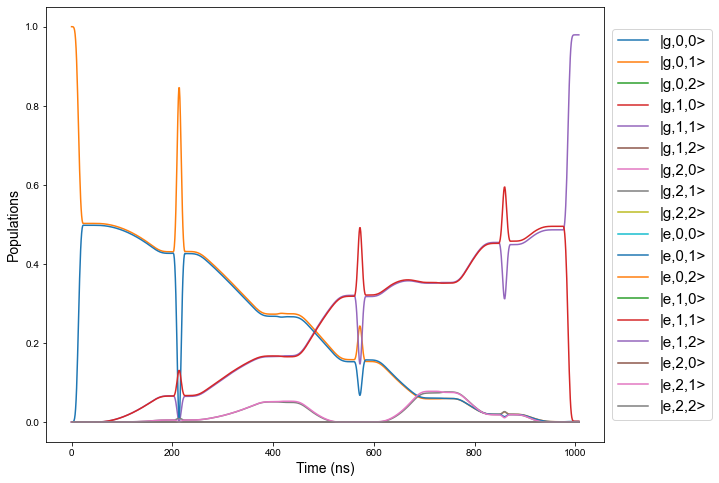

In [82]:
plot_populations(output2, 'g01 to g11_eta1Hz.png')

# Turning chi of second mode off

In [86]:
def get_hammy(eta, chi_2): 
    '''
    get hamiltonian for system with specified eta
    '''
    
    # Displace Frame hammy
    H0_disp = ((chi/2)*tensor(sigmaz(), num_c, identity_c) # first mode -qubit
            +
          (chi_2/2)*tensor(sigmaz(), identity_c, num_c) # 2nd mode - qubit
           +
          (eta)*tensor(identity_q, num_c, num_c)) # MODE-MODE
    
    # prepping time depedent hammys
    alpha_sq =np.real( [np.real(i)**2 + np.imag(i)**2 for i in alpha])
    
    H = [H0_disp,
         #Qubit drive
        [tensor(a_q, identity_c, identity_c), np.conjugate(qubit_dac_pulse_GHz)], 
         [tensor(adag_q, identity_c, identity_c), qubit_dac_pulse_GHz],

         # Desired Displacement term from qubit-mode coupling
         [(chi/2)*tensor(sigmaz(), a_c, identity_c), alpha_star],  
         [(chi/2)*tensor(sigmaz(), adag_c, identity_c), alpha],

         # UnDesired Displacement term from mode-mode coupling
         [(eta)*tensor(identity_q, a_c, num_c), alpha_star],  
         [(eta)*tensor(identity_q, adag_c, num_c), alpha],

         # Undesired alpha^2 terms
          [(chi/2)*tensor(sigmaz(), identity_c, identity_c), alpha_sq],
         [(eta)*tensor(identity_q, identity_c, num_c), alpha_sq]
         ]
    return H

In [87]:
def get_fidelity(eta, chi_2):
    """
    With specified eta, we return the overlap between final state after unitary 
    dynamics and the target state
    """
    H = get_hammy(eta, chi_2)
    psi0 = tensor(basis(n_q,0), basis(n_c,0), basis(n_c,1))
    opts = Options(store_states=True, store_final_state=True, nsteps = 5000)
    output = mesolve(H, psi0 , times, c_ops, [], options =opts)
    rho = output.states[-1]
    
    target_state = tensor(basis(n_q,0), basis(n_c, 1), basis(n_c, 1))
    fidelity = np.absolute(rho.overlap(target_state))
    print('Eta is ' + str(eta) + ' and fidelity is ' + str(fidelity))
    print(rho.overlap(target_state))
    
    return fidelity 

In [90]:
etas = [i*(10**-9) for i in range(10)] #Hz in GHz units
chis = [i*2*pi*(10**-6) for i in range(10)] #kHz in GHz units 

fids = []
for chi in chis: 
    for eta in etas: 
        fids.append(get_fidelity(eta, chi))
        print(fids[-1])

Eta is 0.0 and fidelity is 0.0
0j
0.0
Eta is 1e-09 and fidelity is 1.1073563282116465e-09
(1.0911156528136339e-09+1.8895679351496526e-10j)
1.1073563282116465e-09
Eta is 2e-09 and fidelity is 1.8977223717671493e-09
(-1.504943830511127e-09+1.1560684526930189e-09j)
1.8977223717671493e-09
Eta is 3.0000000000000004e-09 and fidelity is 1.2952469273122654e-09
(1.2715434086499461e-09+2.466616359119129e-10j)
1.2952469273122654e-09
Eta is 4e-09 and fidelity is 1.1610719385024937e-09
(1.1475008734338014e-09-1.7700223684067108e-10j)
1.1610719385024937e-09
Eta is 5e-09 and fidelity is 2.2105125816879537e-10
(1.979522382930261e-10-9.837972399223545e-11j)
2.2105125816879537e-10
Eta is 6.000000000000001e-09 and fidelity is 1.3219089619857868e-09
(1.8724568167507506e-10-1.3085802835410509e-09j)
1.3219089619857868e-09
Eta is 7.000000000000001e-09 and fidelity is 5.687939446462081e-10
(1.74810904394292e-10+5.412649066501941e-10j)
5.687939446462081e-10
Eta is 8e-09 and fidelity is 1.3727149280652003e-09
(

Eta is 7.000000000000001e-09 and fidelity is 0.04682434044342084
(-0.04680377556253615+0.0013876062312919884j)
0.04682434044342084
Eta is 8e-09 and fidelity is 0.04682434044147916
(-0.0468043526229674+0.00136800340806055j)
0.04682434044147916
Eta is 9.000000000000001e-09 and fidelity is 0.04682434017822097
(-0.04680492121191753+0.0013484003381604112j)
0.04682434017822097
Eta is 0.0 and fidelity is 0.05462012097861762
(-0.054590931917963735+0.0017854321737530692j)
0.05462012097861762
Eta is 1e-09 and fidelity is 0.05462012111407323
(-0.05459167498539808+0.0017625699432050619j)
0.05462012111407323
Eta is 2e-09 and fidelity is 0.05462012096316852
(-0.05459240819118594+0.0017397074231305064j)
0.05462012096316852
Eta is 3.0000000000000004e-09 and fidelity is 0.05462012083057266
(-0.054593131839502596+0.0017168446350923432j)
0.05462012083057266
Eta is 4e-09 and fidelity is 0.054620120711633836
(-0.05459384592544698+0.0016939815884500526j)
0.054620120711633836
Eta is 5e-09 and fidelity is 0.0

Eta is 0 and fidelity is 0.0702029989624121
(-0.07016468848424363+0.002318955201267111j)
Eta is 0 and fidelity is 0.0701995984506399
(-0.07016157201579223+0.0023102889221663565j)
Eta is 0 and fidelity is 0.07019748154753154
(-0.07015972022215482+0.002302188950757811j)
Eta is 0 and fidelity is 0.07019884372427067
(-0.07016134858469338+0.0022940847852074044j)
Eta is 0 and fidelity is 0.07019840980281707
(-0.07016118075492199+0.002285925177998331j)
Eta is 0 and fidelity is 0.07019833977503274
(-0.07016137233239357+0.0022778805074416477j)
Eta is 0 and fidelity is 0.07019831280225519
(-0.0701616105991633+0.0022696956656436396j)
Eta is 0 and fidelity is 0.07019824824869035
(-0.07016180978067507+0.002261527246160297j)
Eta is 0 and fidelity is 0.07019835068327994
(-0.07016218022347864+0.00225319882408358j)
Eta is 0 and fidelity is 0.07019822217346025
(-0.0701623143341483+0.002245004140454019j)


Text(0, 0.5, 'Fidelity')

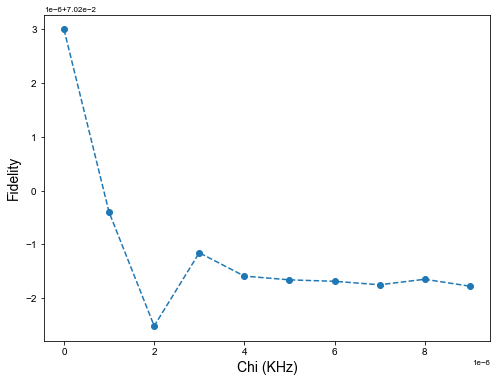

In [91]:
chis = [i*2*pi*(10**-6) for i in range(10)] #kHz in GHz units 
fids = [get_fidelity(0,chi_2) for chi_2 in chis]

fig = plt.figure(figsize=(8,6))
plt.plot([eta*(10**3) for eta in etas], fids, linestyle = '--', marker = 'o')

plt.xticks(fontsize= 10)
plt.yticks(fontsize= 10)
plt.xlabel("Chi (KHz)", fontsize = 14)
plt.ylabel("Fidelity", fontsize = 14)

Eta is 1e-09 and fidelity is 0.07020299883353365
(-0.07016565323570417+0.0022895744644021326j)
Eta is 1e-09 and fidelity is 0.07019820602898935
(-0.07016348583503551+0.0022075744982237465j)
Eta is 1e-09 and fidelity is 0.07019805252532667
(-0.0701658656983991+0.0021255279679983693j)
Eta is 1e-09 and fidelity is 0.07019787681155758
(-0.07016813389399733+0.002043255902885598j)
Eta is 1e-09 and fidelity is 0.07019767901109755
(-0.07017028963565794+0.0019607628599507434j)
Eta is 1e-09 and fidelity is 0.07019745813449293
(-0.07017233116122865+0.0018780489724036578j)
Eta is 1e-09 and fidelity is 0.07019724744599683
(-0.07017429104501934+0.0017951115072403054j)
Eta is 1e-09 and fidelity is 0.07019697970568259
(-0.07017610134939878+0.0017119460268723873j)
Eta is 1e-09 and fidelity is 0.07019668726281163
(-0.07017779356106714+0.0016285556709010993j)
Eta is 1e-09 and fidelity is 0.07019646969870216
(-0.07017946666310533+0.0015449326985013453j)


Text(0, 0.5, 'Fidelity')

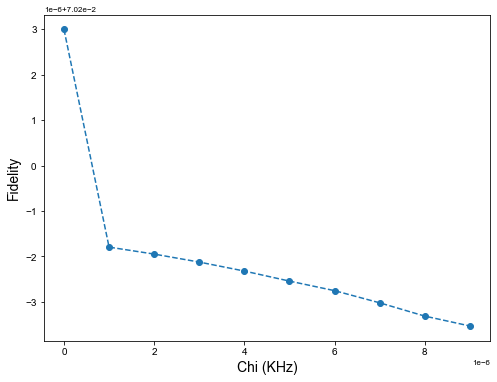

In [93]:
chis = [i*10*2*pi*(10**-6) for i in range(10)] #kHz in GHz units 
fids = [get_fidelity(10**-9,chi_2) for chi_2 in chis]

fig = plt.figure(figsize=(8,6))
plt.plot([eta*(10**3) for eta in etas], fids, linestyle = '--', marker = 'o')

plt.xticks(fontsize= 10)
plt.yticks(fontsize= 10)
plt.xlabel("Chi (KHz)", fontsize = 14)
plt.ylabel("Fidelity", fontsize = 14)

In [94]:
chi

9e-06

In [95]:
chis[0]

0.0